<a href="https://colab.research.google.com/github/AkashB7/Self-Evolving-Neural-Network-Model-for-Multiclass-Classification/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.weights1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.weights2 = np.random.randn(self.hidden_dim, self.output_dim)

        self.bias1 = np.zeros((1, self.hidden_dim))
        self.bias2 = np.zeros((1, self.output_dim))

    def forward(self, X):
        self.hidden_layer = np.dot(X, self.weights1) + self.bias1
        self.hidden_activation = self.sigmoid(self.hidden_layer)
        self.output_layer = np.dot(self.hidden_activation, self.weights2) + self.bias2
        self.predicted_output = self.sigmoid(self.output_layer)

    def backward(self, X, y, learning_rate):
        error = self.predicted_output - y

        d_output = error * self.sigmoid_derivative(self.predicted_output)
        d_hidden = np.dot(d_output, self.weights2.T) * self.sigmoid_derivative(self.hidden_activation)

        self.weights2 -= learning_rate * np.dot(self.hidden_activation.T, d_output)
        self.bias2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
        self.weights1 -= learning_rate * np.dot(X.T, d_hidden)
        self.bias1 -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

mlp = MLP(2, 4, 1)

learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):
    mlp.forward(X)

    mlp.backward(X, y, learning_rate)

mlp.forward(X)
d = mlp.predicted_output
y_actual = y

E_d = np.mean(d)
E_d_squared = np.mean(d**2)

print("Predicted Output (d):")
print(d)
print("Actual Output (y):")
print(y_actual)
print("Mean of Predicted Output (E(d)):", E_d)
print("Mean of Predicted Output Squared (E(d^2)):", E_d_squared)

Predicted Output (d):
[[0.0222042 ]
 [0.9510067 ]
 [0.94840088]
 [0.06049689]]
Actual Output (y):
[[0]
 [1]
 [1]
 [0]]
Mean of Predicted Output (E(d)): 0.49552716889603016
Mean of Predicted Output Squared (E(d^2)): 0.45200771928163413


In [ ]:
import numpy as np

input_size = 10
hidden_size = 5
output_size = 1

def forward_propagation(X, weights):
    z1 = np.dot(X, weights['W1'])
    a1 = sigmoid(z1)

    z2 = np.dot(a1, weights['W2'])
    a2 = sigmoid(z2)

    return a1, a2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def backward_propagation(X, y_true, weights, a1, a2):
    delta2 = (a2 - y_true) * sigmoid_derivative(a2)
    dW2 = np.dot(a1.T, delta2)

    delta1 = np.dot(delta2, weights['W2'].T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, delta1)

    return {'W1': dW1, 'W2': dW2}

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.random.randn(400, input_size)
y_true = np.random.randn(400, output_size)

weights = {
    'W1': np.random.randn(input_size, hidden_size),
    'W2': np.random.randn(hidden_size, output_size)
}

learning_rate = 0.1
epochs = 100

for epoch in range(epochs):
    a1, a2 = forward_propagation(X, weights)

    gradients = backward_propagation(X, y_true, weights, a1, a2)

    weights['W1'] -= learning_rate * gradients['W1']
    weights['W2'] -= learning_rate * gradients['W2']

_, y_pred = forward_propagation(X, weights)

E_d = np.mean(y_pred)
E_d_squared = np.mean(y_pred ** 2)

print("Mean of Predicted Output (E(d)): ", E_d)
print("Mean of Predicted Output Squared (E(d^2)): ", E_d_squared)

print(X.shape[0])
print(X.shape[1])

Mean of Predicted Output (E(d)):  0.12738908483304806
Mean of Predicted Output Squared (E(d^2)):  0.0933277094922941
400
10


In [ ]:
import numpy as np

input_size = 10
hidden_size = 5
output_size = 1
batch_size = 20

class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.weights1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.weights2 = np.random.randn(self.hidden_dim, self.output_dim)

        self.bias1 = np.zeros((1, self.hidden_dim))
        self.bias2 = np.zeros((1, self.output_dim))

    def forward(self, X, bs):
        self.batch_size = bs

        self.hidden_layer = np.dot(X, self.weights1) + self.bias1
        self.hidden_activation = self.sigmoid(self.hidden_layer)
        self.output_layer = np.dot(self.hidden_activation, self.weights2) + self.bias2
        self.predicted_output = self.sigmoid(self.output_layer)

    def backward(self, X, y, learning_rate):
        error = self.predicted_output - y

        d_output = error * self.sigmoid_derivative(self.predicted_output)
        d_hidden = np.dot(d_output, self.weights2.T) * self.sigmoid_derivative(self.hidden_activation)

        self.weights2 -= learning_rate * np.dot(self.hidden_activation.T, d_output) / self.batch_size
        self.bias2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True) / self.batch_size
        self.weights1 -= learning_rate * np.dot(X.T, d_hidden) / self.batch_size
        self.bias1 -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True) / self.batch_size

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)


X = np.random.randn(400, input_size)
y_true = np.random.randn(400, output_size)

mlp = MLP(input_size, hidden_size, output_size)

learning_rate = 0.1
epochs = 100

num_batches = X.shape[0] // 20  # batch_size=20

for epoch in range(epochs):
    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size

        batch_X = X[start_idx:end_idx]
        batch_y = y_true[start_idx:end_idx]

        mlp.forward(batch_X, batch_size)
        mlp.backward(batch_X, batch_y, learning_rate)

mlp.forward(X, batch_size)
d = mlp.predicted_output
y_actual = y_true

E_d = np.mean(d)
E_d_squared = np.mean(d ** 2)

loss = np.mean((y_actual - d) ** 2)
accuracy = 1 - loss / E_d_squared

print("Predicted Output (d):")
print(d)
print("Actual Output (y):")
print(y_actual)
print("Mean of Predicted Output (E(d)):", E_d)
print("Mean of Predicted Output Squared (E(d^2)):", E_d_squared)
print("Loss:", loss)
print("Accuracy:", accuracy)

Predicted Output (d):
[[0.09611195]
 [0.0066334 ]
 [0.05475127]
 [0.01899855]
 [0.0238622 ]
 [0.03091592]
 [0.02693625]
 [0.0274587 ]
 [0.01194565]
 [0.0074861 ]
 [0.05344164]
 [0.01495646]
 [0.03843164]
 [0.00747351]
 [0.01291976]
 [0.0310117 ]
 [0.00595011]
 [0.02932019]
 [0.09510114]
 [0.04086157]
 [0.02477996]
 [0.03953478]
 [0.02826289]
 [0.10406524]
 [0.11450218]
 [0.04880297]
 [0.01999538]
 [0.04359055]
 [0.13992056]
 [0.01345931]
 [0.00879658]
 [0.08217739]
 [0.00899606]
 [0.01177305]
 [0.02223105]
 [0.07105182]
 [0.0064216 ]
 [0.05051498]
 [0.03961177]
 [0.01299844]
 [0.05072176]
 [0.01124446]
 [0.00579808]
 [0.03094606]
 [0.0423006 ]
 [0.01035384]
 [0.00870973]
 [0.12570046]
 [0.0433678 ]
 [0.01553592]
 [0.04237958]
 [0.08238271]
 [0.00898794]
 [0.02092431]
 [0.02278914]
 [0.03335939]
 [0.09820151]
 [0.03229863]
 [0.04503394]
 [0.02332039]
 [0.02017143]
 [0.03424238]
 [0.10201379]
 [0.0478735 ]
 [0.02809467]
 [0.07712682]
 [0.04683266]
 [0.01339988]
 [0.02286523]
 [0.02284007

In [ ]:
import numpy as np

input_size = 10
hidden_size = 5
output_size = 1
batch_size = 20

class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.weights1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.weights2 = np.random.randn(self.hidden_dim, self.output_dim)

        self.bias1 = np.zeros((1, self.hidden_dim))
        self.bias2 = np.zeros((1, self.output_dim))

    def forward(self, X, bs):
        self.batch_size = bs

        self.hidden_layer = np.dot(X, self.weights1) + self.bias1
        self.hidden_activation = self.sigmoid(self.hidden_layer)
        self.output_layer = np.dot(self.hidden_activation, self.weights2) + self.bias2
        self.predicted_output = self.sigmoid(self.output_layer)

    def backward(self, X, y, learning_rate):
        error = self.predicted_output - y

        d_output = error * self.sigmoid_derivative(self.predicted_output)
        d_hidden = np.dot(d_output, self.weights2.T) * self.sigmoid_derivative(self.hidden_activation)

        self.weights2 -= learning_rate * np.dot(self.hidden_activation.T, d_output) / self.batch_size
        self.bias2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True) / self.batch_size
        self.weights1 -= learning_rate * np.dot(X.T, d_hidden) / self.batch_size
        self.bias1 -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True) / self.batch_size

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)


X = np.random.randn(400, input_size)
y_true = np.random.randn(400, output_size)

mlp = MLP(input_size, hidden_size, output_size)

learning_rate = 0.1
epochs = 100

num_batches = X.shape[0] // 20  # batch_size=20

for epoch in range(epochs):
    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size

        batch_X = X[start_idx:end_idx]
        batch_y = y_true[start_idx:end_idx]

        mlp.forward(batch_X, batch_size)
        mlp.backward(batch_X, batch_y, learning_rate)

        if batch % 10 == 0:
            mlp.forward(X, batch_size)
            d = mlp.predicted_output
            y_actual = y_true

            E_d = np.mean(d)
            E_d_squared = np.mean(d ** 2)

            loss = np.mean((y_actual - d) ** 2)
            accuracy = 1 - loss / E_d_squared

            print(f"Batch: {batch}, Loss: {loss}, Accuracy: {accuracy}")

mlp.forward(X, batch_size)
d = mlp.predicted_output
y_actual = y_true

E_d = np.mean(d)
E_d_squared = np.mean(d ** 2)

loss = np.mean((y_actual - d) ** 2)
accuracy = 1 - loss / E_d_squared

print("\nFinal Results:")
print("Predicted Output (d):")
print(d)
print("Actual Output (y):")
print(y_actual)
print("Mean of Predicted Output (E(d)):", E_d)
print("Mean of Predicted Output Squared (E(d^2)):", E_d_squared)
print("Loss:", loss)
print("Accuracy:", accuracy)

Batch: 0, Loss: 1.1629487943023538, Accuracy: -5.843381714650218
Batch: 10, Loss: 1.142373027135848, Accuracy: -6.688206476738188
Batch: 0, Loss: 1.1208609580143902, Accuracy: -7.892343394124717
Batch: 10, Loss: 1.1076901579729412, Accuracy: -8.8496595317877
Batch: 0, Loss: 1.0925690580879766, Accuracy: -10.30282678479973
Batch: 10, Loss: 1.0840251539956107, Accuracy: -11.331663708976654
Batch: 0, Loss: 1.0731259068165047, Accuracy: -13.019191895137874
Batch: 10, Loss: 1.0674440765923623, Accuracy: -14.08461757512502
Batch: 0, Loss: 1.0593585483648673, Accuracy: -15.99061497027688
Batch: 10, Loss: 1.0554747613038038, Accuracy: -17.065016664683455
Batch: 0, Loss: 1.049309803913575, Accuracy: -19.173687633497085
Batch: 10, Loss: 1.0465842864049788, Accuracy: -20.235884001656764
Batch: 0, Loss: 1.0417672605077866, Accuracy: -22.53202753833137
Batch: 10, Loss: 1.039808618753498, Accuracy: -23.56588895485147
Batch: 0, Loss: 1.0359637187141655, Accuracy: -26.035111706663535
Batch: 10, Loss: 

Batch: 0, Loss: 2.376748934931022, Accuracy: 0.11236666666666667
Batch: 10, Loss: 2.1860256850802915, Accuracy: 0.3015
Batch: 20, Loss: 2.102355904607788, Accuracy: 0.17078333333333334
Batch: 30, Loss: 1.9813679658971053, Accuracy: 0.51195
Batch: 40, Loss: 1.878724980540914, Accuracy: 0.57485
Batch: 50, Loss: 1.7810213593119388, Accuracy: 0.65265
Batch: 60, Loss: 1.671878001235389, Accuracy: 0.70015
Batch: 70, Loss: 1.5860062082870312, Accuracy: 0.69535
Batch: 80, Loss: 1.5019501280233758, Accuracy: 0.7326166666666667
Batch: 90, Loss: 1.4015245018077578, Accuracy: 0.7435166666666667
Batch: 100, Loss: 1.31980581915553, Accuracy: 0.7136833333333333
Batch: 110, Loss: 1.2532061278098654, Accuracy: 0.75825
Batch: 120, Loss: 1.1833487130670728, Accuracy: 0.7631
Batch: 130, Loss: 1.125027825353433, Accuracy: 0.75585
Batch: 140, Loss: 1.065675864656514, Accuracy: 0.79695
Batch: 150, Loss: 1.0156549801688766, Accuracy: 0.8120833333333334
Batch: 160, Loss: 0.9697274539245075, Accuracy: 0.8189333

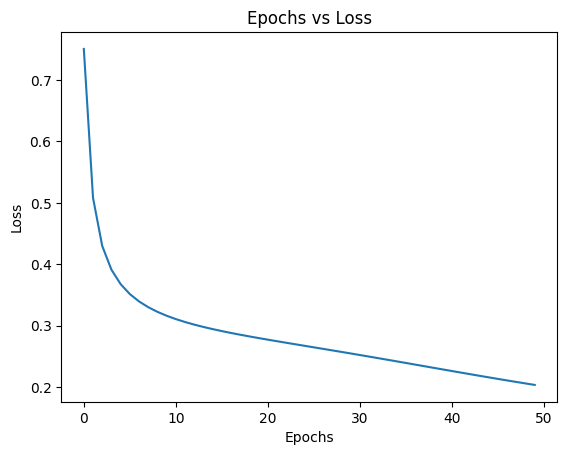

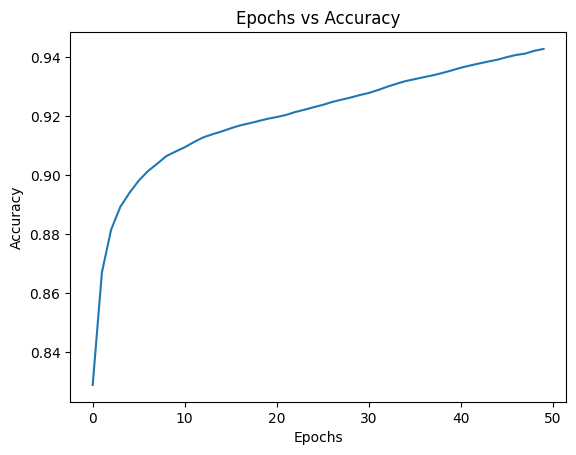

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

input_size = 784
hidden_size = 512
output_size = 10
batch_size = 256

class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.weights1 = np.random.randn(self.input_dim, self.hidden_dim) / np.sqrt(self.input_dim)
        self.weights2 = np.random.randn(self.hidden_dim, self.output_dim) / np.sqrt(self.hidden_dim)

        self.bias1 = np.zeros((1, self.hidden_dim))
        self.bias2 = np.zeros((1, self.output_dim))

    def forward(self, X, bs):
        self.batch_size = bs

        self.hidden_layer = np.dot(X, self.weights1) + self.bias1
        self.hidden_activation = self.sigmoid(self.hidden_layer)
        self.output_layer = np.dot(self.hidden_activation, self.weights2) + self.bias2
        self.predicted_output = self.softmax(self.output_layer)

    def backward(self, X, y, learning_rate):
        error = self.predicted_output - y

        d_output = error
        d_hidden = np.dot(d_output, self.weights2.T) * self.sigmoid_derivative(self.hidden_activation)

        self.weights2 -= learning_rate * np.dot(self.hidden_activation.T, d_output) / self.batch_size
        self.bias2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True) / self.batch_size
        self.weights1 -= learning_rate * np.dot(X.T, d_hidden) / self.batch_size
        self.bias1 -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True) / self.batch_size

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

(X_train, y_train), (_, _) = mnist.load_data()

X_train = X_train.reshape(-1, input_size) / 255.0

mlp = MLP(input_size, hidden_size, output_size)

learning_rate = 0.1
epochs = 50

num_batches = X_train.shape[0] // batch_size

losses = []
accuracies = []

def calculate_accuracy(y_actual, d):
    correct_predictions = np.sum(np.argmax(d, axis=1) == y_actual)
    total_predictions = y_actual.shape[0]
    accuracy = correct_predictions / total_predictions
    return accuracy

for epoch in range(epochs):
    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size

        batch_X = X_train[start_idx:end_idx]
        batch_y = np.zeros((batch_size, output_size))
        batch_y[np.arange(batch_size), y_train[start_idx:end_idx]] = 1

        mlp.forward(batch_X, batch_size)
        mlp.backward(batch_X, batch_y, learning_rate)

        if batch % 10 == 0:
            mlp.forward(X_train, batch_size)
            d = mlp.predicted_output
            y_actual = y_train

            loss = -np.mean(np.log(d[np.arange(X_train.shape[0]), y_actual]))
            accuracy = calculate_accuracy(y_actual, d)

            print(f"Batch: {batch}, Loss: {loss}, Accuracy: {accuracy}")

    mlp.forward(X_train, batch_size)
    d = mlp.predicted_output
    y_actual = y_train

    loss = -np.mean(np.log(d[np.arange(X_train.shape[0]), y_actual]))
    accuracy = calculate_accuracy(y_actual, d)

    print(f"Epoch: {epoch + 1}, Loss: {loss}, Accuracy: {accuracy}")

    losses.append(loss)
    accuracies.append(accuracy)

plt.figure()
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.show()

plt.figure()
plt.plot(range(epochs), accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.show()

Batch: 0, Loss: 2.109932362576725, Accuracy: 0.07571666666666667
Batch: 10, Loss: 2.095314648939039, Accuracy: 0.08006666666666666
Batch: 20, Loss: 2.0548158020705865, Accuracy: 0.0961
Batch: 30, Loss: 2.004171069663767, Accuracy: 0.11585
Batch: 40, Loss: 1.9573085172319642, Accuracy: 0.13361666666666666
Batch: 50, Loss: 1.9202807080945232, Accuracy: 0.14771666666666666
Batch: 60, Loss: 1.8788568053746983, Accuracy: 0.1638
Batch: 70, Loss: 1.8318688510499386, Accuracy: 0.18196666666666667
Batch: 80, Loss: 1.799249485103504, Accuracy: 0.1946
Batch: 90, Loss: 1.757447032208229, Accuracy: 0.21256666666666665
Batch: 100, Loss: 1.7209268836603742, Accuracy: 0.22661666666666666
Batch: 110, Loss: 1.6892414313798625, Accuracy: 0.23935
Batch: 120, Loss: 1.6530533689432299, Accuracy: 0.2543
Batch: 130, Loss: 1.6229769280716104, Accuracy: 0.26665
Batch: 140, Loss: 1.5869711286899504, Accuracy: 0.28096666666666664
Batch: 150, Loss: 1.5537752348770582, Accuracy: 0.29473333333333335
Batch: 160, Loss

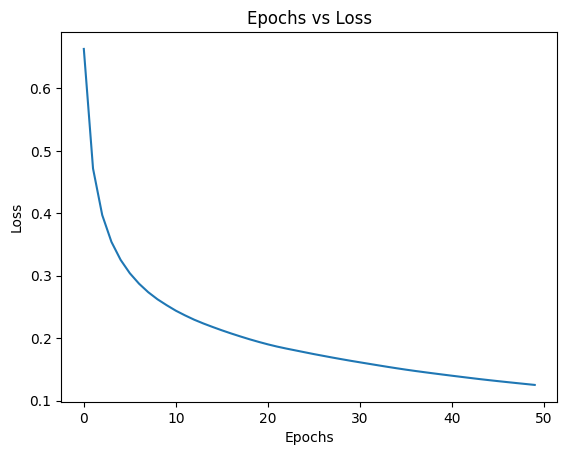

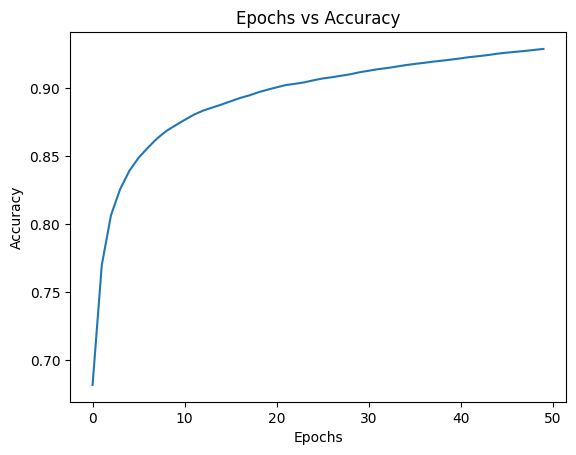

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

input_size = 784
hidden_size = 1024
output_size = 10
batch_size = 64

class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.weights1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.weights2 = np.random.randn(self.hidden_dim, self.output_dim)

        self.bias1 = np.zeros((1, self.hidden_dim))
        self.bias2 = np.zeros((1, self.output_dim))

    def forward(self, X, bs):
        self.batch_size = bs

        self.hidden_layer = np.dot(X, self.weights1) + self.bias1
        self.hidden_activation = self.relu(self.hidden_layer)
        self.output_layer = np.dot(self.hidden_activation, self.weights2) + self.bias2
        self.predicted_output = self.softmax(self.output_layer)

    def backward(self, X, y, learning_rate):
        error = self.predicted_output - y

        d_output = error
        d_hidden = np.dot(d_output, self.weights2.T) * self.relu_derivative(self.hidden_activation)

        self.weights2 -= learning_rate * np.dot(self.hidden_activation.T, d_output) / self.batch_size
        self.bias2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True) / self.batch_size
        self.weights1 -= learning_rate * np.dot(X.T, d_hidden) / self.batch_size
        self.bias1 -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True) / self.batch_size

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

(X_train, y_train), (_, _) = mnist.load_data()

X_train = X_train.reshape(-1, input_size) / 255.0

y_train_encoded = np.zeros((y_train.shape[0], output_size))
y_train_encoded[np.arange(y_train.shape[0]), y_train] = 1

mlp = MLP(input_size, hidden_size, output_size)

learning_rate = 0.001
epochs = 50

num_batches = X_train.shape[0] // batch_size

losses = []
accuracies = []

def calculate_accuracy(y_actual, d):
    correct_predictions = np.sum(np.argmax(y_actual, axis=1) == np.argmax(d, axis=1))
    total_predictions = y_actual.shape[0]
    accuracy = correct_predictions / total_predictions
    return accuracy

for epoch in range(epochs):
    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size

        batch_X = X_train[start_idx:end_idx]
        batch_y = y_train_encoded[start_idx:end_idx]

        mlp.forward(batch_X, batch_size)
        mlp.backward(batch_X, batch_y, learning_rate)

        if batch % 10 == 0:
            mlp.forward(X_train, batch_size)
            d = mlp.predicted_output
            y_actual = y_train_encoded

            loss = np.mean(-(y_actual * np.log(d + 1e-10)))
            accuracy = calculate_accuracy(y_actual, d)

            print(f"Batch: {batch}, Loss: {loss}, Accuracy: {accuracy}")

    mlp.forward(X_train, batch_size)
    d = mlp.predicted_output
    y_actual = y_train_encoded

    loss = np.mean(-(y_actual * np.log(d + 1e-10)))
    accuracy = calculate_accuracy(y_actual, d)

    print(f"Epoch: {epoch + 1}, Loss: {loss}, Accuracy: {accuracy}")

    losses.append(loss)
    accuracies.append(accuracy)

plt.figure()
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.show()

plt.figure()
plt.plot(range(epochs), accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.show()

In [ ]:
def calculate_mean(x):
    mean = sum(x) / len(x)

    return mean

x = [1, 2, 3, 4, 5]

mean = calculate_mean(x)
print("Mean (μ) =", mean)

Mean (μ) = 3.0


In [ ]:
import numpy as np

def calculate_E(W, x, b):
    W = np.array(W)
    x = np.array(x)
    b = np.array(b)

    assert W.shape[1] == x.shape[0]
    assert W.shape[0] == b.shape[0]

    E = np.dot(W, x) + b

    return E

W = [[1, 2, 3], [4, 5, 6]]
x = [0.5, 0.7, 0.9]
b = [0.1, 0.2]

result = calculate_E(W, x, b)
print("E(v) =", result)

E(v) = [ 4.7 11.1]


In [ ]:
import numpy as np

def calculate_E(W, x, b):
    W = np.array(W)
    x = np.array(x)
    b = np.array(b)

    assert W.shape[1] == x.shape[0]
    assert W.shape[0] == b.shape[0]

    v = np.dot(W, x) + b

    return v

def calculate_sigmoid(v):
    sigmoid = 1 / (1 + np.exp(-v))

    return sigmoid

W = [[1, 2, 3], [4, 5, 6]]
x = [0.5, 0.7, 0.9]
b = [0.1, 0.2]

v = calculate_E(W, x, b)
E_h = calculate_sigmoid(v)
print("E(h) =", E_h)

E(h) = [0.9909867  0.99998489]


In [ ]:
import numpy as np

def calculate_E(w, h, B):
    w = np.array(w)
    h = np.array(h)
    B = np.array(B)

    assert w.shape[1] == h.shape[0]
    assert w.shape[0] == B.shape[0]

    E_O = np.dot(w, h) + B

    return E_O

w = [[0.1, 0.2], [0.3, 0.4]]
h = [0.8, 0.9]
B = [0.5, 0.6]

result = calculate_E(w, h, B)
print("E(O) =", result)

E(O) = [0.76 1.2 ]


In [ ]:
import numpy as np

def calculate_E(w, h, B):
    w = np.array(w)
    h = np.array(h)
    B = np.array(B)

    assert w.shape[1] == h.shape[0]
    assert w.shape[0] == B.shape[0]

    E_O = np.dot(w, h) + B

    return E_O

def calculate_sigmoid(O):
    sigmoid = 1 / (1 + np.exp(-O))

    return sigmoid

w = np.array([[0.1, 0.2], [0.3, 0.4]])
h = np.array([0.8, 0.9])
B = np.array([0.5, 0.6])

O = calculate_E(w, h, B)
E_d = calculate_sigmoid(O)
print("E(d) =", E_d)

E(d) = [0.68135373 0.76852478]
